In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv("July19_myspeed.csv")
dataset.head()

,Service_provider,technology,Download_Upload,Data_Speed.Kbps.,signal_strength,Service_Area
0,JIO,4G,download,44259,-69.0,NaN
1,JIO,4G,upload,3424,-69.0,NaN
2,VODAFONE,4G,download,30759,NaN,Kerala
3,VODAFONE,4G,download,29738,NaN,Kerala
4,VODAFONE,4G,upload,1688,NaN,Kerala


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643126 entries, 0 to 643125
Data columns (total 6 columns):
Service_provider    643126 non-null object
technology          643126 non-null object
Download_Upload     643126 non-null object
Data_Speed.Kbps.    643126 non-null int64
signal_strength     571283 non-null float64
Service_Area        631951 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 29.4+ MB


In [4]:
dataset.describe()

,Data_Speed.Kbps.,signal_strength
count,643126.000000,571283.000000
mean,9840.368478,-88.829934
std,16859.639752,15.405002
min,0.000000,-112.000000
25%,843.000000,-102.000000
50%,3165.000000,-92.000000
75%,8806.000000,-77.000000
max,141235.000000,-50.000000


In [5]:
total = dataset.isna().sum().sort_values(ascending=False)

percent = (dataset.isna().sum()/dataset.isna().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                  Total   Percent
signal_strength   71843  0.111709
Service_Area      11175  0.017376
Data_Speed.Kbps.      0  0.000000
Download_Upload       0  0.000000
technology            0  0.000000
Service_provider      0  0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

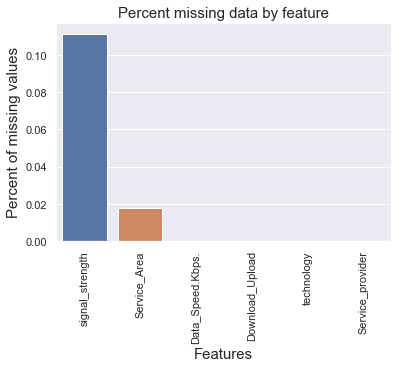

In [6]:
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Part4: Data Cleaning

<h6>Displaying total and percent of NaN values in the complete dataset</h6>

In [7]:
# Counting the total number of missing values for each column
total_missing = dataset.isna().sum().sort_values(ascending = False)

# Calculating the minssing value percent for each column
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)

missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)

print(missing_data)

                  Total NaNs  Percent NaNs
signal_strength        71843     11.170906
Service_Area           11175      1.737607
Data_Speed.Kbps.           0      0.000000
Download_Upload            0      0.000000
technology                 0      0.000000
Service_provider           0      0.000000


<h6>Calculating median of the signal strength values of two groups as follows:</h6>
<ol>
    <li>Median of all signal strength data points having same <strong>Download/Upload type, Service provider and technology</strong></li>
    <li>Median of all signal strength data points having same <strong>Service Area, Download/Upload type, Service provider and technology</strong></li>
</ol>
<p><strong style="color: red;">Note: </strong>We are calculating median and not mean due to possible outliers</p>

In [8]:
# Finding median of signal strength points having same Download/Upload type, Service provider and technology
signal_distr_overall = dataset.groupby(['Download_Upload', 'Service_provider', 'technology'], as_index = False)['signal_strength'].median()

# Finding median of signal strength points having same Service Area, Download/Upload type, Service provider and technology
signal_distr_area_wise = dataset.groupby(['Download_Upload', 'Service_provider', 'technology', 'Service_Area'], as_index = False)['signal_strength'].median()

print(signal_distr_area_wise.head())
print(signal_distr_overall.head())

signal_distr_overall['signal_strength'] = signal_distr_overall['signal_strength']*-1 
signal_distr_area_wise['signal_strength'] = signal_distr_area_wise['signal_strength']*-1 

  Download_Upload Service_provider technology    Service_Area  signal_strength
0        download           AIRTEL         3G  Andhra Pradesh            -79.0
1        download           AIRTEL         3G           Assam            -85.0
2        download           AIRTEL         3G           Bihar            -91.0
3        download           AIRTEL         3G         Chennai            -85.0
4        download           AIRTEL         3G           Delhi            -77.0
  Download_Upload Service_provider technology  signal_strength
0        download           AIRTEL         3G            -85.0
1        download           AIRTEL         4G            -97.0
2        download          CELLONE         3G            -81.0
3        download          CELLONE         4G            -91.0
4        download          DOLPHIN         3G            -89.0


<ol>
    <li><h6>Comparing the distribution of signal strength of all the service providers over all areas using bar plot</h6></li>
    <li><h6>Comparing the distribution of signal strength over each service area for each service provider using bar plot</h6></li>
</ol>

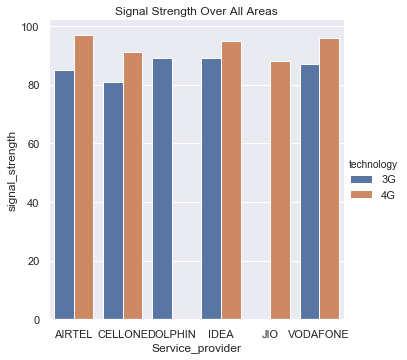

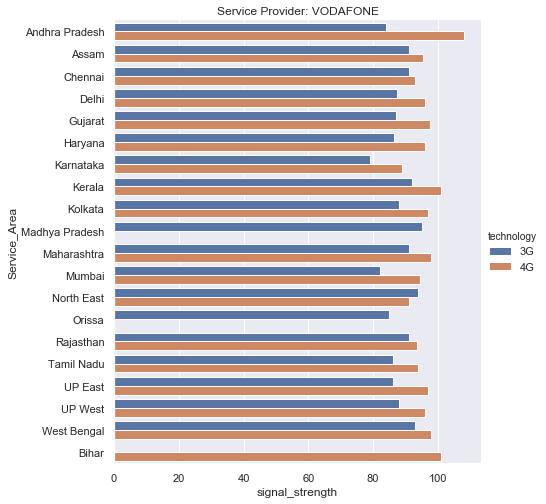

<Figure size 1440x720 with 0 Axes>

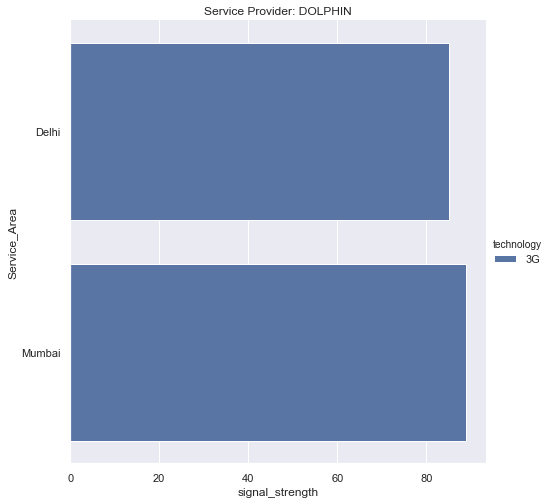

<Figure size 1440x720 with 0 Axes>

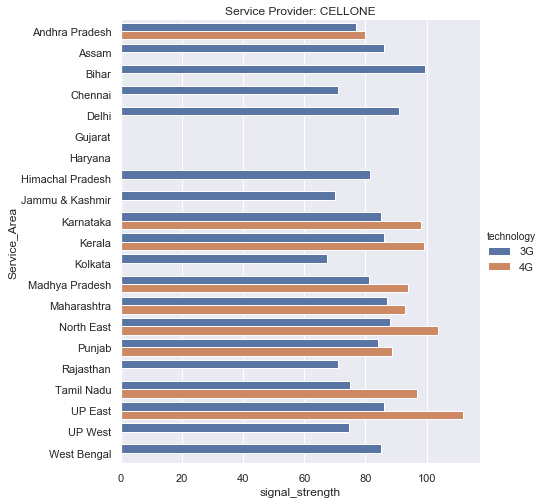

<Figure size 1440x720 with 0 Axes>

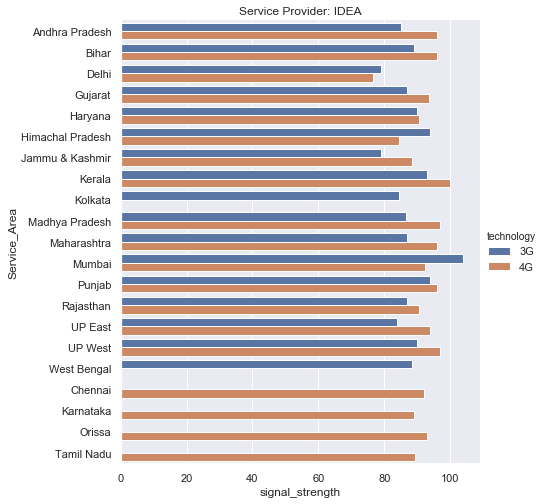

<Figure size 1440x720 with 0 Axes>

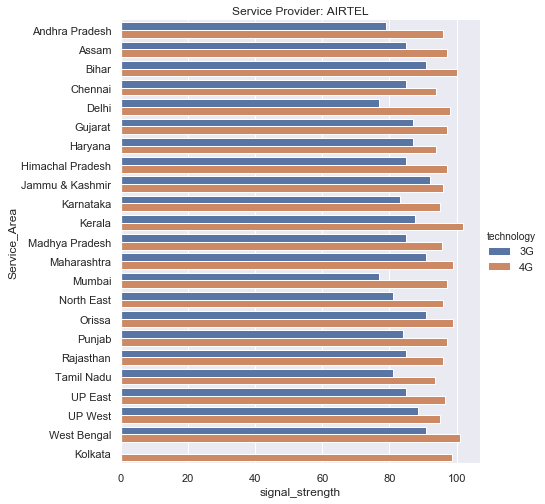

<Figure size 1440x720 with 0 Axes>

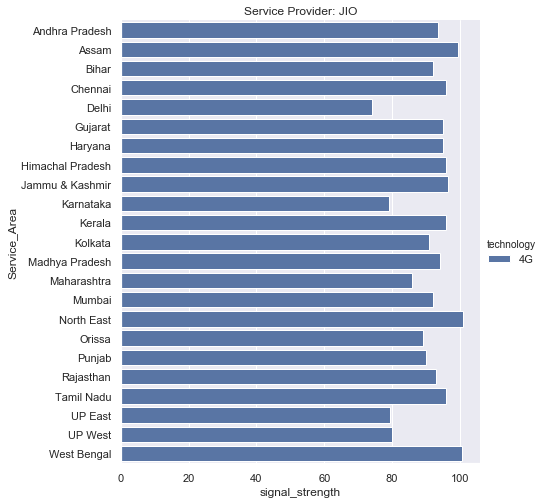

<Figure size 1440x720 with 0 Axes>

In [9]:
# Creating a bar plot for signal strength distribution over all areas
sns.catplot(x='Service_provider', y='signal_strength', hue='technology', data=signal_distr_overall, kind='bar', ci=None)
plt.title('Signal Strength Over All Areas')

# Creating individual bar plots for each service provider over all areas
for provider in set(signal_distr_area_wise['Service_provider']):
    sns.catplot(x='signal_strength', y='Service_Area',  hue='technology', data=signal_distr_area_wise.loc[
            signal_distr_area_wise['Service_provider'] == provider], 
            kind='bar', ci=None, orient='h', height = 7)
    plt.title("Service Provider: " + provider)
    plt.figure(figsize = (20, 10))



<h5>Dropping the rows having no entry for Service Area because the fraction is just 1.74%</h5>

In [10]:
# Dropping data points having NaN values in Service Area column
dataset.dropna(subset = ['Service_Area'], inplace=True)

# Showing the remaining missing values
total_missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)
print(missing_data)

                  Total NaNs  Percent NaNs
signal_strength        70724     11.191374
Service_Area               0      0.000000
Data_Speed.Kbps.           0      0.000000
Download_Upload            0      0.000000
technology                 0      0.000000
Service_provider           0      0.000000


***Doing Box Plot visualistion for outliers***


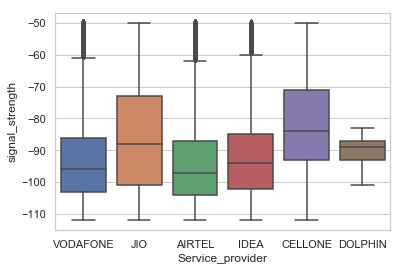

In [11]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'Service_provider', y = 'signal_strength', data = dataset)

<h4>Filling the missing values in signal strength column</h4>
We have created a <strong>4-dimensional dictionary</strong> that stores median of the signal strength over the data points having same download/upload type, service provider, technology and service area.<br>
The 4 indices of the dictionary are the above 4 features.

In [12]:
from collections import defaultdict

# The nested_dict function will help to create an n-dimensional dictionary
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

# Storing the median values in the dictionary
signal_dict = nested_dict(4, float)

for index, row in signal_distr_area_wise.iterrows():
    signal_dict[row['Download_Upload']][row['Service_provider']][row['technology']][row['Service_Area']] = float(row['signal_strength'])



In [13]:
null_data = dataset[dataset.isnull().any(axis=1)]
length = len(null_data)
itr = 1

# Filling the missing values in the signal strength column
for index, row in null_data.iterrows():
    if(itr*100 % length == 0):
        print('\r'+str((itr/length)*100.00)[:4]+"% Completed", end="", flush=True)
    if(pd.isna(row['signal_strength'])):
        appropriate_median = signal_dict[row['Download_Upload']][row['Service_provider']][row['technology']][row['Service_Area']]
        
        if(pd.isna(appropriate_median) == False and appropriate_median != 0):
            dataset.at[index, 'signal_strength'] =  -appropriate_median
    itr += 1

100.% Completed

In [14]:
# Showing remaining missing values
total_missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)
print(missing_data)

                  Total NaNs  Percent NaNs
signal_strength           31      0.004905
Service_Area               0      0.000000
Data_Speed.Kbps.           0      0.000000
Download_Upload            0      0.000000
technology                 0      0.000000
Service_provider           0      0.000000


<h5>The Signal Strength column still has very few missing values. The reason is that while calculating median over 4 features, data for all the points having same 4 features was not present</h5>
<h5>Due to very small percent of missing value, we will drop the rows having those missing values.</h5>

In [15]:
# Dropping the missing values from the signal strength column
dataset.dropna(subset = ['signal_strength'], inplace=True)
total_missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = (total_missing/dataset.isna().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total NaNs', 'Percent NaNs'], sort = False)
print(missing_data)

                  Total NaNs  Percent NaNs
Service_Area               0           0.0
signal_strength            0           0.0
Data_Speed.Kbps.           0           0.0
Download_Upload            0           0.0
technology                 0           0.0
Service_provider           0           0.0


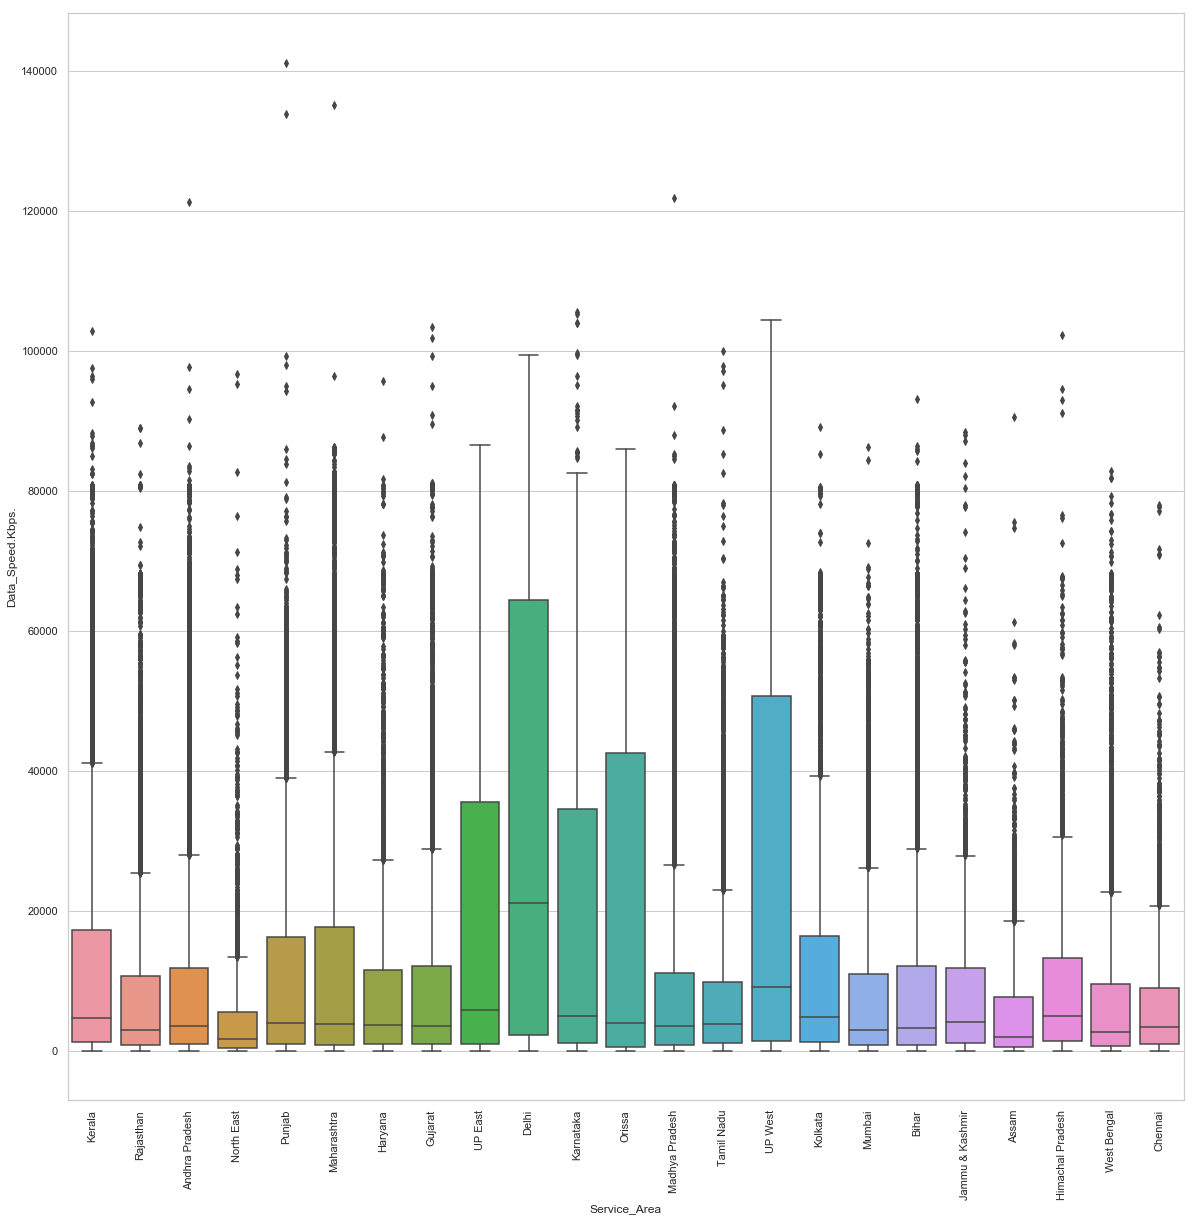

In [16]:
#download speed data
download_data=dataset[dataset['Download_Upload']=='download']
plt.figure(figsize=(20, 20))
plt.xticks(rotation="90")
sns.boxplot(x="Service_Area", y="Data_Speed.Kbps.", data=download_data)

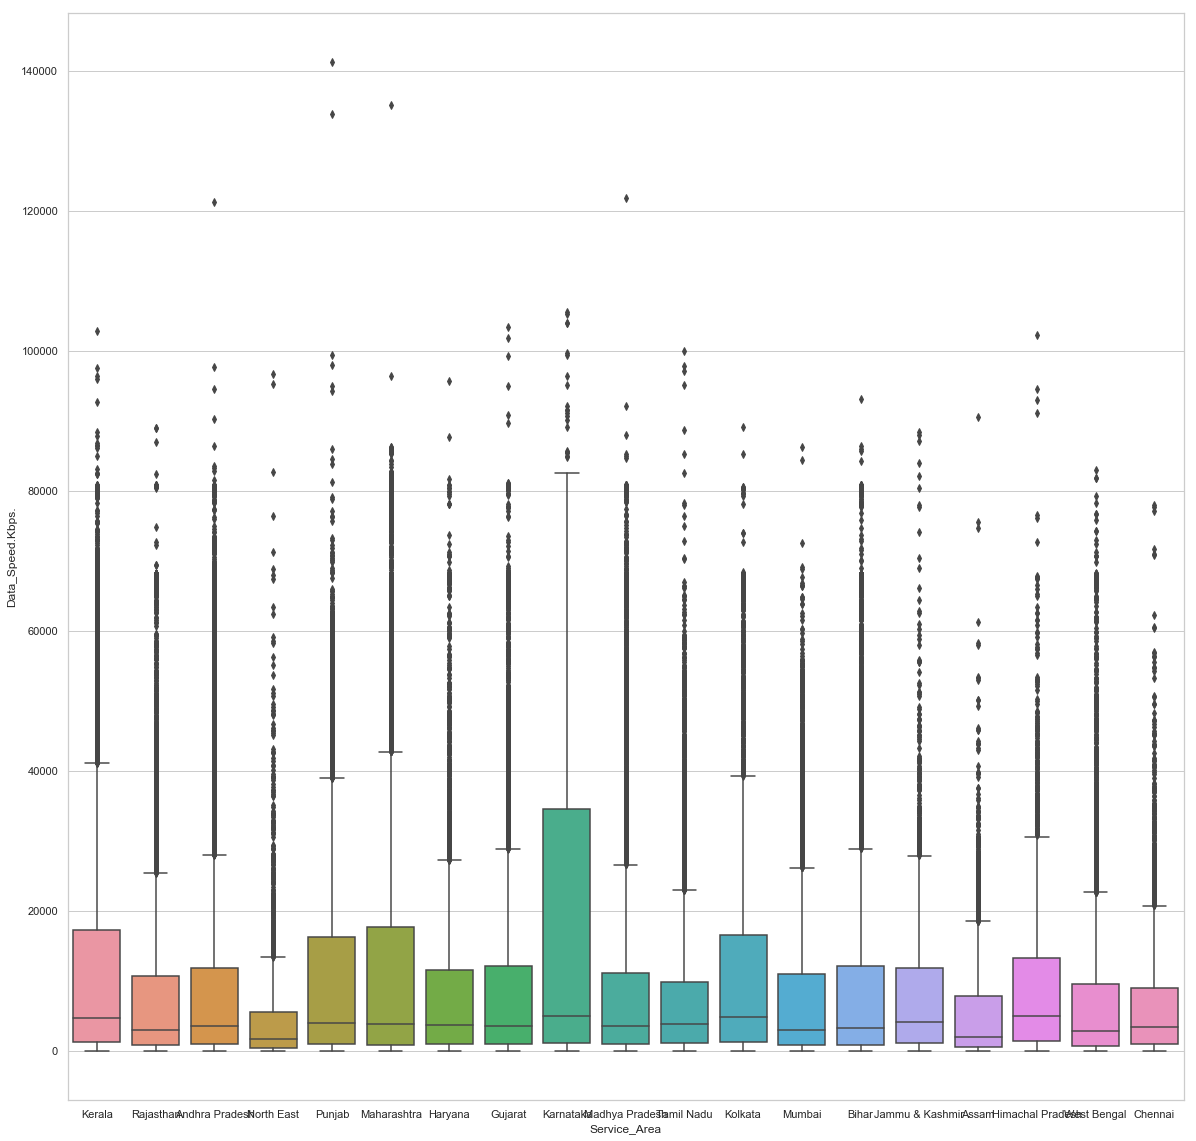

In [17]:
#removing states without outliers
arr = ['UP East','UP West','Delhi','Orissa']
for i in range(0,len(arr)):
    query='Service_Area !=' + "'"+arr[i]+"'" 
    download_data=download_data.query(query) 
plt.figure(figsize=(20, 20))    
sns.boxplot(x="Service_Area", y="Data_Speed.Kbps.", data=download_data)


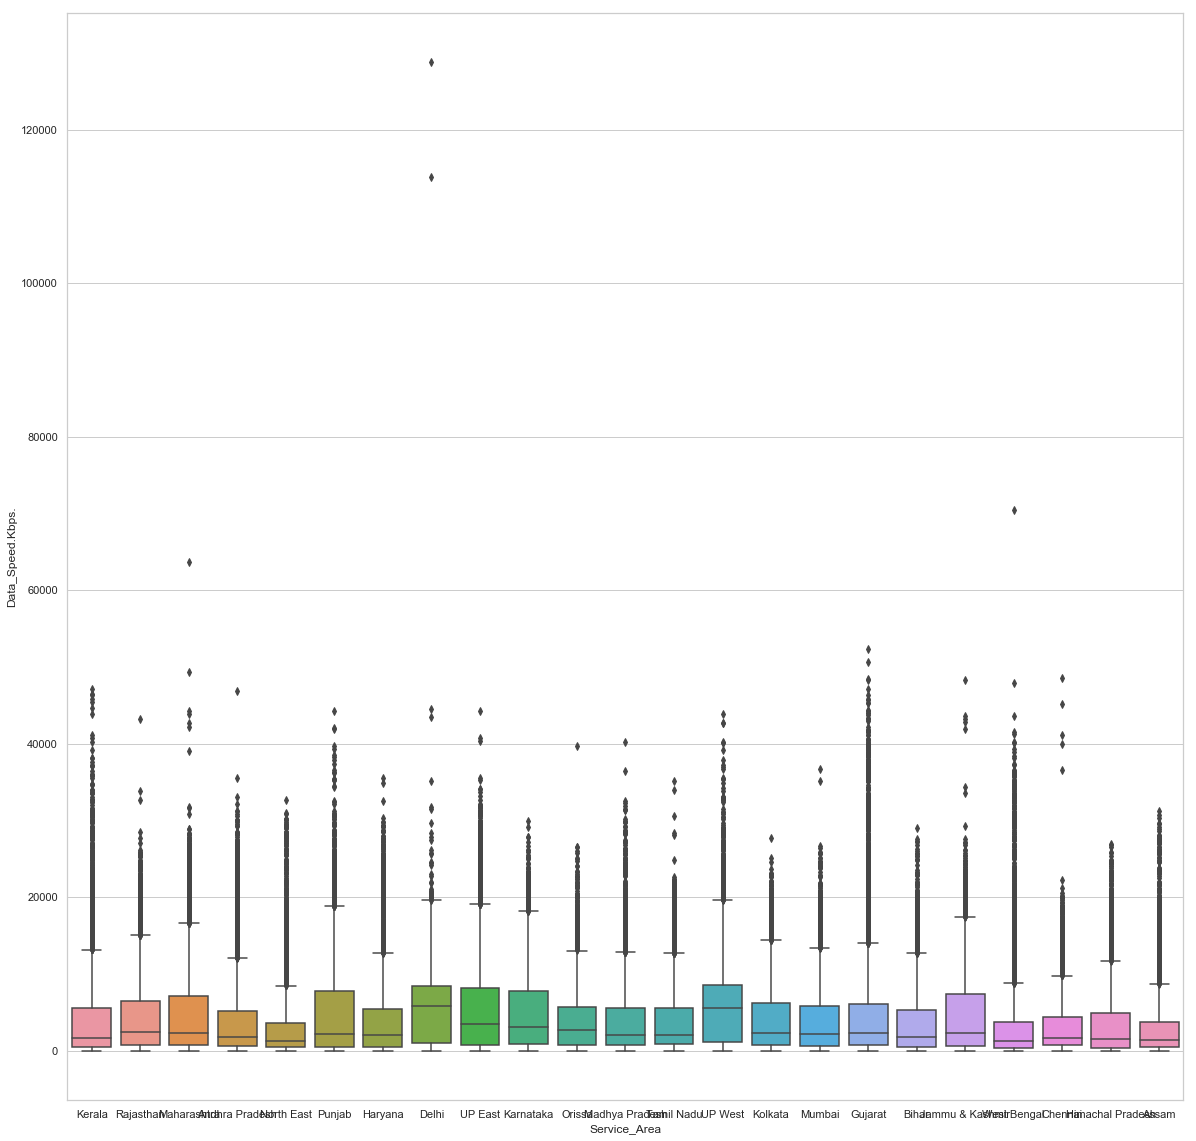

In [18]:
#upload speed data
upload_data=dataset[dataset['Download_Upload']=='upload']
plt.figure(figsize=(20, 20))
sns.boxplot(x="Service_Area", y="Data_Speed.Kbps.", data=upload_data)

In [19]:
# the threshold is set to remove approximately top 0.1% of points that are considered as outliers
q75, q25 = np.percentile(download_data['Data_Speed.Kbps.'], [75 ,25])
download_thres=q75+(5.0)*(q75-q25)

In [20]:
print("Threshold for download is",download_thres)
x=len(download_data[download_data['Data_Speed.Kbps.']>download_thres])
print("Percentage of outliers",100*x/len(download_data))

Threshold for download is 74951.0
Percentage of outliers 0.9517290402411573


In [21]:
q75, q25 = np.percentile(upload_data['Data_Speed.Kbps.'], [75 ,25])
upload_thres=q75+(2)*(q75-q25)

In [22]:
print("Threshold for upload is",upload_thres)
x=len(upload_data[upload_data['Data_Speed.Kbps.']>upload_thres])
print("Percentage of outliers",100*x/len(upload_data))

Threshold for upload is 19940.0
Percentage of outliers 1.1659051022182871


In [23]:
download_final=download_data[download_data['Data_Speed.Kbps.']<download_thres]
upload_final=upload_data[upload_data['Data_Speed.Kbps.']<upload_thres]

In [24]:
#adding back the removed states
to_append=[download_final,upload_final]
temp=dataset[dataset['Download_Upload']=='download']
arr = ['UP East','UP West','Delhi','Orissa']
for i in range(0,len(arr)):
    query='Service_Area ==' + "'"+arr[i]+"'" 
    to_append.append(temp.query(query))
outliers_removed=pd.concat(to_append)

In [25]:
df = outliers_removed
df.head()

,Service_provider,technology,Download_Upload,Data_Speed.Kbps.,signal_strength,Service_Area
2,VODAFONE,4G,download,30759,-101.0,Kerala
3,VODAFONE,4G,download,29738,-101.0,Kerala
6,JIO,4G,download,14554,-102.0,Rajasthan
7,AIRTEL,3G,download,1419,-107.0,Rajasthan
8,JIO,4G,download,17458,-93.0,Rajasthan


technology
3G     34419
4G    591644
Name: technology, dtype: int64
626063


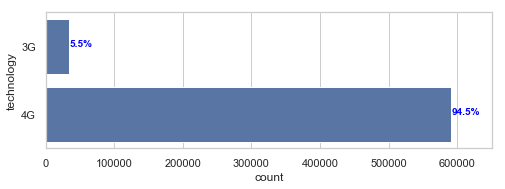

Download_Upload
upload      312547
download    313516
Name: Download_Upload, dtype: int64
626063


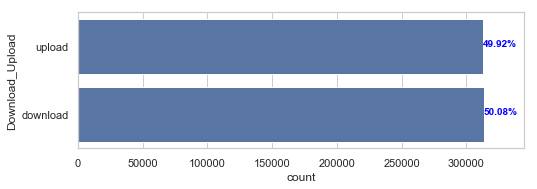

Service_provider
DOLPHIN         52
CELLONE      22971
VODAFONE     59792
IDEA         65416
AIRTEL       98103
JIO         379729
Name: Service_provider, dtype: int64
626063


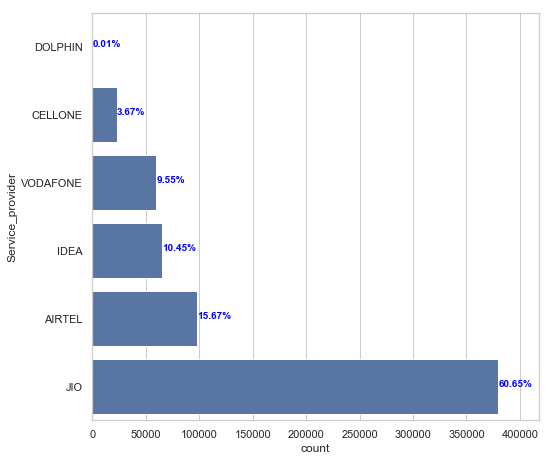

Service_Area
Jammu & Kashmir      6711
North East           6819
Himachal Pradesh     6852
Assam                7154
Chennai              7740
Haryana             12629
West Bengal         13660
Kolkata             14041
Bihar               16153
Orissa              16160
Mumbai              18938
Punjab              20524
Rajasthan           21106
Tamil Nadu          27433
Madhya Pradesh      28676
Gujarat             29394
UP West             35990
Karnataka           37020
Kerala              42593
Andhra Pradesh      45190
Delhi               52112
UP East             70660
Maharashtra         88508
Name: Service_Area, dtype: int64
626063


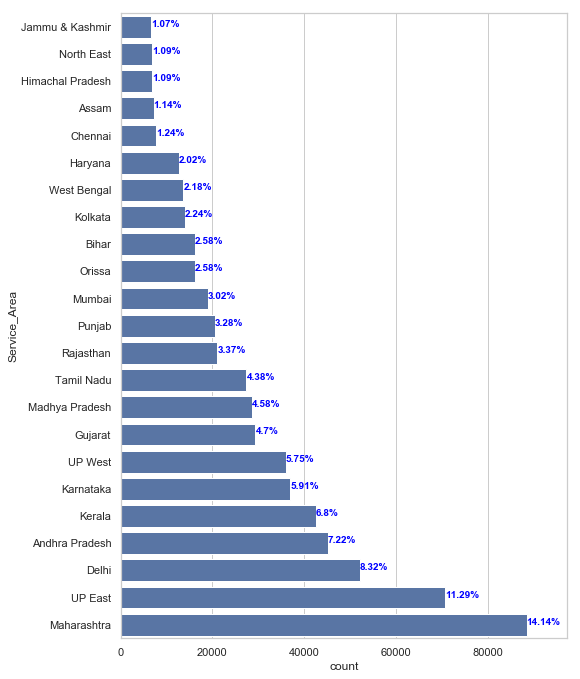

In [26]:
columns = ['technology', 'Download_Upload','Service_provider','Service_Area']

for c in columns:
    v = df[c].unique()
    g = df.groupby(by=c)[c].count().sort_values(ascending=True)
    print(g.head(len(v)))
    tem = pd.DataFrame(columns = [c,'count'])
    tem[c] = g.index
    tem['count'] = np.array(g.head(len(v)))
    dims = (8, 2.5*len(v)/2)
    if c == 'Service_Area':
        dims = (8, len(v)/2)
    plt.figure(figsize=dims)
    plt.margins(x=0.1)
    gr=sns.barplot(x="count", y=c, data=tem,label="Total", color="b")
    total = sum(g.head(len(v)))
    print(total)
    for (i, u) in enumerate(g.head(len(v))):
        gr.text(x = u, y = i, s = str(round(u/total*100, 2))+'%', color = 'blue', fontweight = 'bold')
    plt.show() 

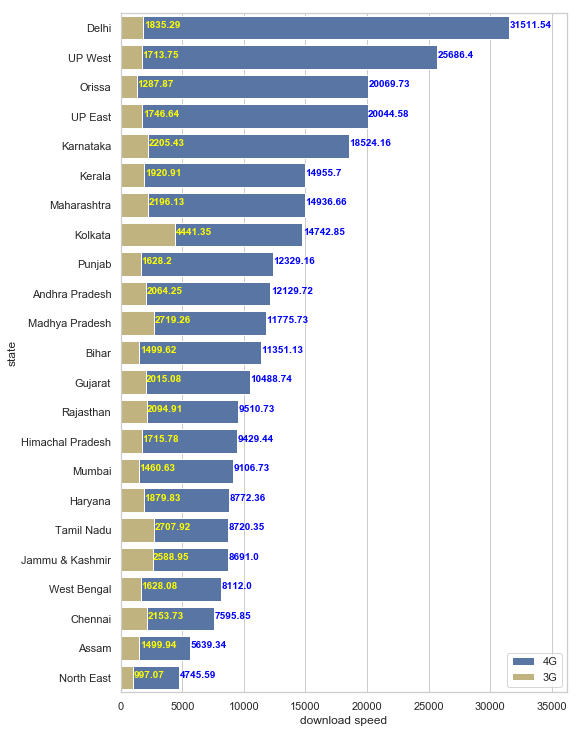

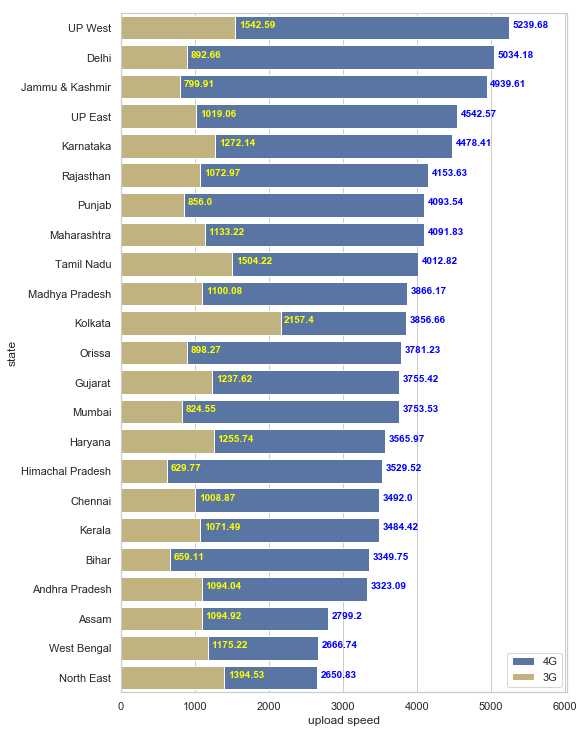

In [27]:
state = 'Service_Area'
service = 'Service_provider'
speed = 'Data_Speed.Kbps.'

values = df[state].unique()

for tech in ['download','upload']:
    plt.figure(figsize = (8, len(values)/2 +1))
    plt.margins(x=0.15)
    data = df.loc[df['Download_Upload'] == tech]
    data = data.loc[df['technology'] == '4G']
    group = data.groupby(by=state)[speed].mean().sort_values(ascending = False)
    tem = pd.DataFrame(columns=['state',tech + ' speed'])
    tem['state'] = group.index
    tem[tech + ' speed'] = np.array(group.head(len(values)))
    gr1=sns.barplot(x=tech + " speed",y='state', data=tem,label="4G", color="b")
    total = sum(group.head(len(values)))
    for (i, v) in enumerate(group.head(len(values))):
        gr1.text(x = v+50, y = i, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
    data = df.loc[df['Download_Upload'] == tech]
    data = data.loc[df['technology'] == '3G']
    temp = data.groupby(by=state)[speed].mean()
    for v in group.index:
        group.head(len(values))[v] = temp.head(len(values))[v]
    tem['state'] = group.index
    tem[tech + ' speed'] = np.array(group.head(len(values)))    
    gr2=sns.barplot(x=tech +" speed", y='state', data=tem,label="3G", color="y")
    total = sum(group.head(len(values)))
    for (i, v) in enumerate(group.head(len(values))):
        gr2.text(x = v+50, y = i, s = str(round(v, 2)), color = 'yellow', fontweight = 'bold') 
    plt.legend(loc = 'lower right')    
    plt.show()

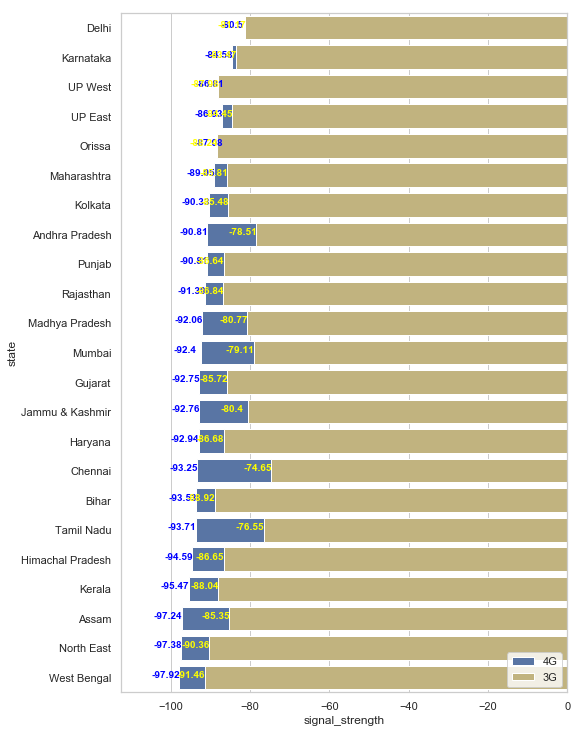

In [28]:
plt.figure(figsize = (8, len(values)/2 +1))
plt.margins(x=0.15)
data = df.loc[df['technology'] == '4G']
group = data.groupby(by=state)['signal_strength'].mean().sort_values(ascending = False)
tem = pd.DataFrame(columns=['state','signal_strength'])
tem['state'] = group.index
tem['signal_strength'] = np.array(group.head(len(values)))
gr1=sns.barplot(x='signal_strength',y='state', data=tem,label="4G", color="b")
total = sum(group.head(len(values)))
for (i, v) in enumerate(group.head(len(values))):
    gr1.text(x = v-7, y = i, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
data = df.loc[df['technology'] == '3G']
temp = data.groupby(by=state)['signal_strength'].mean()
for v in group.index:
    group.head(len(values))[v] = temp.head(len(values))[v]
tem['state'] = group.index
tem['signal_strength'] = np.array(group.head(len(values)))    
gr2=sns.barplot(x='signal_strength', y='state', data=tem,label="3G", color="y")
total = sum(group.head(len(values)))
for (i, v) in enumerate(group.head(len(values))):
    gr2.text(x = v-7, y = i, s = str(round(v, 2)), color = 'yellow', fontweight = 'bold')
plt.legend(loc = 'lower right')    
plt.show()

['VODAFONE' 'JIO' 'AIRTEL' 'IDEA' 'CELLONE' 'DOLPHIN']


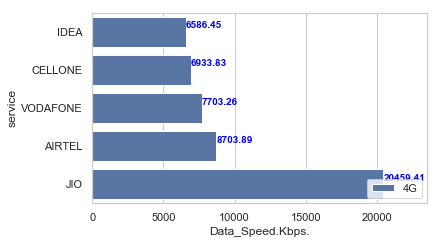

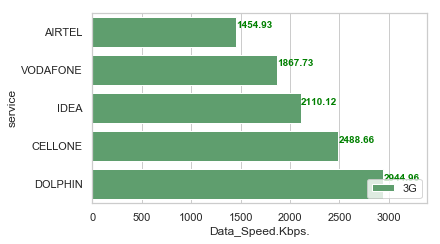

In [29]:
print(df[service].unique())
data = df.loc[df['Download_Upload'] == 'download']
data = data.loc[df['technology'] == '4G']
values = data[service].unique()
group = data.groupby(by=service)[speed].mean().sort_values(ascending = True)
r = np.arange(len(values))
tem = pd.DataFrame()
tem['service']=group.index
tem['speed']=np.array(group.head(len(values)))
plt.figure(figsize = (6, len(values)/2 +1))
gr1 = sns.barplot(y = tem['service'], x=tem['speed'],data=tem, label = '4G',color='b')
for (i, v) in enumerate(group.head(len(values))):
    gr1.text(x = v + 0.2, y = i - 0.1, s = str(round(v, 2)), color = 'blue', fontweight = 'bold')
plt.yticks(r, group.index)
plt.xlabel(speed)
plt.margins(x = 0.15)
plt.legend(loc = 'lower right')

#3g
data = df.loc[df['Download_Upload'] == 'download']
data = data.loc[df['technology'] == '3G']
values = data[service].unique()
group = data.groupby(by=service)[speed].mean().sort_values(ascending = True)
r = np.arange(len(values))
tem['service']=group.index
tem['speed']=np.array(group.head(len(values)))
plt.figure(figsize = (6, len(values)/2 +1))
gr2 = sns.barplot(y = tem['service'], x=tem['speed'],data=tem, label = '3G',color='g')
for (i, v) in enumerate(group.head(len(values))):
    gr2.text(x = v + 0.02, y = i - 0.1, s = str(round(v, 2)), color = 'green', fontweight = 'bold')
plt.yticks(r, group.index)
plt.xlabel(speed)
plt.margins(x = 0.15)
plt.legend(loc = 'lower right')
plt.show()

In [30]:
df = df.reset_index()
df = df.drop(['index'],axis=1)
df.head()

,Service_provider,technology,Download_Upload,Data_Speed.Kbps.,signal_strength,Service_Area
0,VODAFONE,4G,download,30759,-101.0,Kerala
1,VODAFONE,4G,download,29738,-101.0,Kerala
2,JIO,4G,download,14554,-102.0,Rajasthan
3,AIRTEL,3G,download,1419,-107.0,Rajasthan
4,JIO,4G,download,17458,-93.0,Rajasthan


In [35]:
providers=df['Service_provider'].unique()
states=df['Service_Area'].unique()
threshold=(int)(len(df)/2);

to_append=[]

for provider in providers:
    for state in states:
        temp=df.query('Service_provider ==' + "'"+ provider +"'" + "and " +'Service_Area ==' + "'"+ state +"'")
        cnt=len(temp)
#         print(state,provider,cnt)
        if(provider=='CELLONE' or provider=='DOLPHIN'):
            to_append.append(temp)
        elif cnt>0:    
            prop=cnt/len(df)
            to_append.append(temp.sample((int)(prop*threshold)))

sampled_data=pd.concat(to_append)
sampled_data =sampled_data.sample(frac=1, axis=1).reset_index(drop=True)
df = sampled_data
df.shape

(324478, 6)

<h5>Applying Standardization on Data Speed and Signal Strength</h5>

In [36]:
data_speed_mean = df['Data_Speed.Kbps.'].mean()
data_speed_std = df['Data_Speed.Kbps.'].std()

# Standardizing the Data Speed column
df['Data_Speed.Kbps.'] = (df['Data_Speed.Kbps.'] - data_speed_mean) / data_speed_std

signal_strength_mean = df['signal_strength'].mean()
signal_strength_std = df['signal_strength'].std()

# Standardizing the Signal Strength column
df['signal_strength'] = (df['signal_strength'] - signal_strength_mean) / signal_strength_std

df.head()

,Download_Upload,Service_Area,technology,signal_strength,Data_Speed.Kbps.,Service_provider
0,download,Kerala,4G,-0.814683,0.085442,VODAFONE
1,download,Kerala,4G,-0.202352,-0.201549,VODAFONE
2,download,Kerala,3G,0.137832,-0.541806,VODAFONE
3,upload,Kerala,4G,-1.563086,-0.530423,VODAFONE
4,upload,Kerala,4G,-1.154866,-0.518731,VODAFONE


In [37]:
def one_hot(df,col):
    values = df[col].unique()
    val_dict = {}
    for i in range(len(values)):
        val_dict[values[i]] = i
    new_cols = []
    old_col = df[col].values
    for i in range(len(old_col)):
        arr = np.zeros(len(values),dtype=int)
        arr[val_dict[old_col[i]]]=1
        new_cols.append(arr)
    sub_df = pd.DataFrame(new_cols,columns=values,dtype=int)
    sub_df = sub_df.astype(int)
    return sub_df

In [38]:
udf = one_hot(df,service)
new_df = pd.concat([df,udf],axis=1,join='inner')
new_df = new_df.drop([service],axis=1)
print(new_df.shape)

(324478, 11)


In [39]:
udf = one_hot(new_df,'technology')
new_df = pd.concat([new_df,udf],axis=1)
new_df = new_df.drop(['technology'],axis=1)
udf = one_hot(new_df,'Download_Upload')
new_df = pd.concat([new_df,udf],axis=1)
new_df = new_df.drop(['Download_Upload'],axis=1)
udf = one_hot(new_df,'Service_Area')
new_df = pd.concat([new_df,udf],axis=1)
new_df = new_df.drop(['Service_Area'],axis=1)
new_df.head()

,signal_strength,Data_Speed.Kbps.,VODAFONE,JIO,AIRTEL,IDEA,CELLONE,DOLPHIN,4G,3G,...,Chennai,Delhi,UP East,Orissa,UP West,Punjab,Madhya Pradesh,Bihar,Jammu & Kashmir,Himachal Pradesh
0,-0.814683,0.085442,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.202352,-0.201549,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.137832,-0.541806,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.563086,-0.530423,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.154866,-0.518731,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
new_df.shape

(324478, 35)